In [71]:
library(dplyr)
library(ggplot2)
library(qvalue)

In [72]:
neuro_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/"

In [73]:
############################################################################
########## CellRegMap (GxC)
## neuronal development data ("neuroseq") from Jerber et al, Nat Genet 2021
## dopaminergic neurons (DA) eQTLs only - 2,051 eQTL, 1,374 unique eGenes

In [74]:
############################################################
## testing 10 MOFA factors as (continuous) contexts

In [75]:
MOFA_results_folder = paste0(neuro_folder, 'MOFA/MOFA10/')
summary_filename = paste0(MOFA_results_folder, 'summary.csv')
summary = read.csv(summary_filename, row.names=1)
summary$gene = gsub("\\.","-",summary$gene)
head(summary,2)

,gene,n_snps,chrom,pv_raw,snpID,pv,gene_old
0,LINC00662,1,19,0.05827479,19_28250771_G_A,0.05827479,LINC00662
1,ATRAID,2,2,0.66353704,2_27389195_A_G,1.00000000,ATRAID


In [76]:
nrow(summary)
length(unique(summary$gene))

[1] 2051

[1] 1374

In [77]:
###############################################################################
## testing 3 conditions from the original paper as (discrete) contexts
## conditions for dopaminergic neurons: day 30, day 52, rotenone-treated day 52 

In [78]:
outdir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/REVISION/CRM_interaction_discrete_contexts/3conditions/"
dc_filename = paste0(outdir, 'summary.csv')
discrete = read.csv(dc_filename, row.names=1)
discrete$gene = gsub(".tsv","",discrete$gene)
discrete$gene = gsub("\\.","-",discrete$gene)
head(discrete,2)

,gene,n_snps,chrom,pv_raw,snpID
0,LINC00662,1,19,0.1043711,19_28250771_G_A
1,ATRAID,2,2,0.8612612,2_27389195_A_G


In [79]:
nrow(discrete)
length(unique(discrete$gene))

[1] 2051

[1] 1374

In [1261]:
###############################################################################
## testing 9 clusters from the MOFA factors as (discrete) contexts
## using Leiden clustering, resolution = 0.3

In [1740]:
outdir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/REVISION/CRM_interaction_discrete_contexts/9clusters/"
dc_filename = paste0(outdir, 'summary.csv')
discrete9 = read.csv(dc_filename, row.names=1)
discrete9$gene = gsub(".tsv","",discrete9$gene)
discrete9$gene = gsub("\\.","-",discrete9$gene)
head(discrete9,2)

,gene,n_snps,chrom,pv_raw,snpID
0,RNF122,1,8,0.4082997,8_33432305_T_C
1,RASEF,1,9,0.1994500,9_85596321_T_C


In [1741]:
# unique(discrete9$chrom)[order(unique(discrete9$chrom))]

In [1742]:
discrete9_missing = summary[!(summary$gene %in% discrete9$gene),]
unique(discrete9_missing$chrom)[order(unique(discrete9_missing$chrom))]

integer(0)

In [1743]:
nrow(discrete9)
length(unique(discrete9$gene))

[1] 2066

[1] 1374

In [1744]:
###############################################################################
## testing 18 clusters from the MOFA factors as (discrete) contexts
## using Leiden clustering, default parameters 

In [1910]:
outdir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/REVISION/CRM_interaction_discrete_contexts/18clusters/"
dc_filename = paste0(outdir, 'summary.csv')
discrete18 = read.csv(dc_filename, row.names=1)
discrete18$gene = gsub(".tsv","",discrete18$gene)
discrete18$gene = gsub("\\.","-",discrete18$gene)
head(discrete18,2)

,gene,n_snps,chrom,pv_raw,snpID
0,RNF122,1,8,0.2370413,8_33432305_T_C
1,RASEF,1,9,0.4264631,9_85596321_T_C


In [1911]:
discrete18_missing = summary[!(summary$gene %in% discrete18$gene),]
unique(discrete18_missing$chrom)[order(unique(discrete18_missing$chrom))]

integer(0)

In [1912]:
nrow(discrete18)
length(unique(discrete18$gene))

[1] 2057

[1] 1374

In [1691]:
######### Scatter Plots 

In [1190]:
#############################################################
################ continuous (MOFA) vs discrete (3 conditions)

In [1089]:
df_plot = inner_join(summary, discrete, by=c("snpID","gene"), suffix=c(".c",".d"))

In [728]:
nrow(df_plot)
length(unique(df_plot$gene))
head(df_plot,2)

[1] 2051

[1] 1374

gene,n_snps.c,chrom.c,pv_raw.c,snpID,pv.c,gene_old,qv.c,n_snps.d,chrom.d,pv_raw.d,pv.d,qv.d
LINC00662,1,19,0.05827479,19_28250771_G_A,0.05827479,LINC00662,0.2429301,1,19,0.1043711,0.1043711,0.6243003
ATRAID,2,2,0.66353704,2_27389195_A_G,1.00000000,ATRAID,1.0000000,2,2,0.8612612,1.0000000,1.0000000


In [729]:
cor.test(-log10(df_plot$pv_raw.c),-log10(df_plot$pv_raw.d))


	Pearson's product-moment correlation

data:  -log10(df_plot$pv_raw.c) and -log10(df_plot$pv_raw.d)
t = 42.101, df = 2049, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6571371 0.7035912
sample estimates:
      cor 
0.6810489 


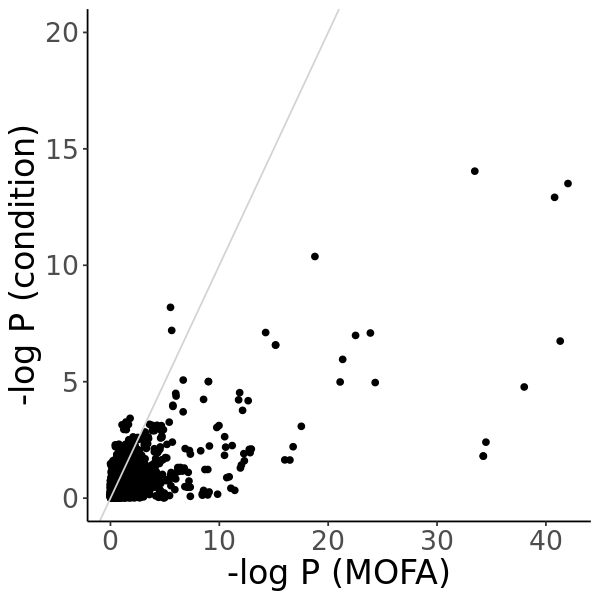

In [730]:
options(repr.plot.width = 5, repr.plot.height = 5)
p = ggplot(df_plot, aes(x=-log10(pv_raw.c),y=-log10(pv_raw.d))) + geom_point()
p = p + theme_classic() + ylim(c(0,20)) + geom_abline(col="lightgrey") + theme(text = element_text(size=20))
p + xlab("-log P (MOFA)") + ylab("-log P (condition)")

In [731]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF15_scatter_condition.pdf"), width=5, height=5)
p + xlab("-log P (MOFA)") + ylab("-log P (condition)")
dev.off()

png 
  2

In [732]:
#############################################################
################ continuous (MOFA) vs discrete (9 clusters)

In [1780]:
df_plot1 = inner_join(summary, discrete9, by=c("snpID","gene"), suffix=c(".c",".d"))

In [1781]:
nrow(df_plot1)
length(unique(df_plot1$gene))
head(df_plot1,2)

[1] 2066

[1] 1374

gene,n_snps.c,chrom.c,pv_raw.c,snpID,pv.c,gene_old,qv.c,n_snps.d,chrom.d,pv_raw.d,pv.d,qv.d
LINC00662,1,19,0.05827479,19_28250771_G_A,0.05827479,LINC00662,0.2429301,1,19,0.1105148,0.1105148,0.5379115
ATRAID,2,2,0.66353704,2_27389195_A_G,1.00000000,ATRAID,1.0000000,2,2,0.6201030,1.0000000,1.0000000


In [1782]:
cor.test(-log10(df_plot1$pv_raw.c),-log10(df_plot1$pv_raw.d))


	Pearson's product-moment correlation

data:  -log10(df_plot1$pv_raw.c) and -log10(df_plot1$pv_raw.d)
t = 55.263, df = 2064, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7544816 0.7893037
sample estimates:
      cor 
0.7724726 


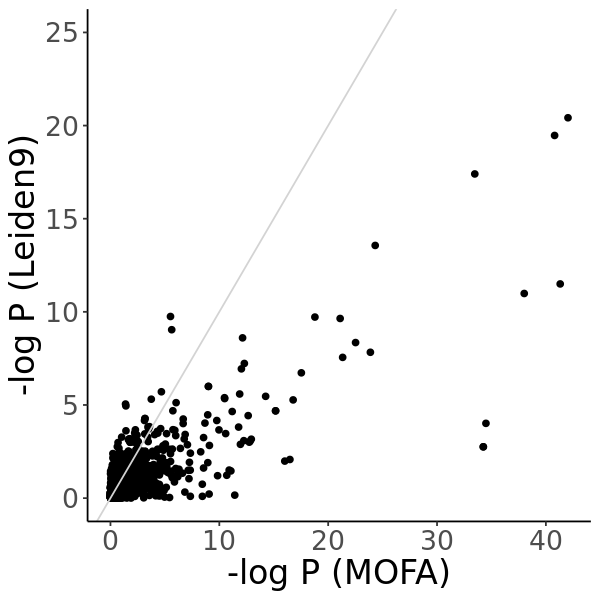

In [1783]:
options(repr.plot.width = 5, repr.plot.height = 5)
p = ggplot(df_plot1, aes(x=-log10(pv_raw.c),y=-log10(pv_raw.d))) + geom_point()
p = p + theme_classic() + ylim(c(0,25)) + geom_abline(col="lightgrey") + theme(text = element_text(size=20))
p + xlab("-log P (MOFA)") + ylab("-log P (Leiden9)")

In [1784]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF15_scatter_Leiden9.pdf"), width=5, height=5)
p + xlab("-log P (MOFA)") + ylab("-log P (Leiden9)")
dev.off()

png 
  2

In [1753]:
#############################################################
################ continuous (MOFA) vs discrete (18 clusters)

In [1913]:
df_plot2 = inner_join(summary, discrete18, by=c("snpID","gene"), suffix=c(".c",".d"))

In [1914]:
nrow(df_plot2)
length(unique(df_plot2$gene))
head(df_plot2,2)

[1] 2057

[1] 1374

gene,n_snps.c,chrom.c,pv_raw.c,snpID,pv,gene_old,qv,n_snps.d,chrom.d,pv_raw.d
LINC00662,1,19,0.05827479,19_28250771_G_A,0.05827479,LINC00662,0.2429301,1,19,0.2328818
ATRAID,2,2,0.66353704,2_27389195_A_G,1.00000000,ATRAID,1.0000000,2,2,0.9033879


In [1915]:
cor.test(-log10(df_plot2$pv_raw.c),-log10(df_plot2$pv_raw.d))


	Pearson's product-moment correlation

data:  -log10(df_plot2$pv_raw.c) and -log10(df_plot2$pv_raw.d)
t = 76.053, df = 2055, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8472166 0.8699076
sample estimates:
      cor 
0.8589833 


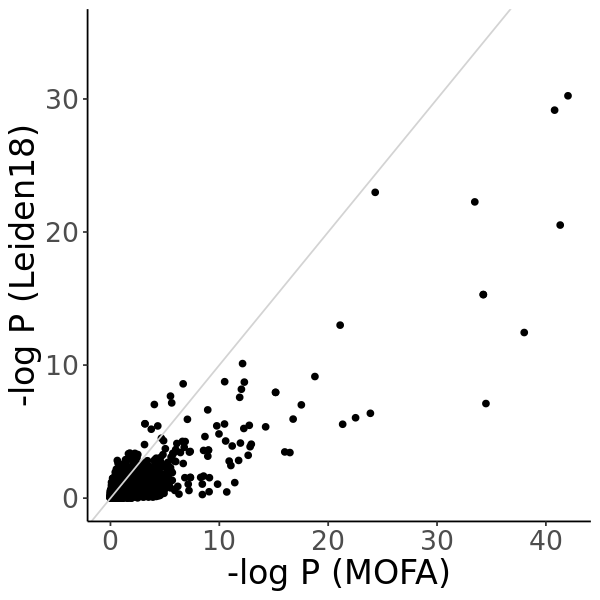

In [1916]:
options(repr.plot.width = 5, repr.plot.height = 5)
p = ggplot(df_plot2, aes(x=-log10(pv_raw.c),y=-log10(pv_raw.d))) + geom_point()
p = p + theme_classic() + ylim(c(0,35)) + geom_abline(col="lightgrey") + theme(text = element_text(size=20))
p + xlab("-log P (MOFA)") + ylab("-log P (Leiden18)")

In [1917]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF15_scatter_Leiden18.pdf"), width=5, height=5)
p + xlab("-log P (MOFA)") + ylab("-log P (Leiden18)")
dev.off()

png 
  2

In [1759]:
######### Power Comparison
# (number of eGenes at FDR<10%)

In [1760]:
########## continuous contexts (MOFA)

In [1761]:
summary$qv = qvalue(summary$pv)$qvalues

In [1762]:
nrow(summary)
nrow(summary[summary$qv<0.1,])
nrow(summary[summary$qv<0.1,])/nrow(summary)

[1] 2051

[1] 333

[1] 0.1623598

In [1763]:
# discrete contexts (3 conditions)

In [1764]:
discrete$pv = as.numeric(discrete$pv_raw) * as.numeric(discrete$n_snps)
discrete$pv[discrete$pv>1]=1
discrete$qv = qvalue(discrete$pv)$qvalues

In [1765]:
nrow(discrete)
nrow(discrete[discrete$qv<0.1,])
nrow(discrete[discrete$qv<0.1,])/nrow(discrete)

[1] 2051

[1] 44

[1] 0.02145295

In [1766]:
# discrete contexts (9 clusters)

In [1799]:
discrete9$pv = as.numeric(discrete9$pv_raw) * as.numeric(discrete9$n_snps)
discrete9$pv[discrete9$pv>1]=1
discrete9$qv = qvalue(discrete9$pv)$qvalues

In [1800]:
nrow(discrete9)
nrow(discrete9[discrete9$qv<0.1,])
nrow(discrete9[discrete9$qv<0.1,])/nrow(discrete9)

[1] 2066

[1] 113

[1] 0.05469506

In [1801]:
# discrete contexts (18 clusters)

In [1918]:
discrete18$pv = as.numeric(discrete18$pv_raw) * as.numeric(discrete18$n_snps)
discrete18$pv[discrete18$pv>1]=1
discrete18$qv = qvalue(discrete18$pv)$qvalues

In [1919]:
nrow(discrete18)
nrow(discrete18[discrete18$qv<0.1,])
nrow(discrete18[discrete18$qv<0.1,])/nrow(discrete18)

[1] 2057

[1] 105

[1] 0.05104521

In [1906]:
## number of overlapping eGenes

In [1920]:
# T = 0.05
T = 0.1

In [1921]:
genes_c = unique(summary[summary$qv<T,"gene"])
genes_d = unique(discrete[discrete$qv<T,"gene"])
genes_d9 = unique(discrete9[discrete9$qv<T,"gene"])
genes_d18 = unique(discrete18[discrete18$qv<T,"gene"])

In [1922]:
c(length(genes_c),length(unique(summary$gene)),length(genes_c)/length(unique(summary$gene)))
c(length(genes_d),length(unique(discrete$gene)),length(genes_d)/length(unique(discrete$gene)))
c(length(genes_d9),length(unique(discrete9$gene)),length(genes_d9)/length(unique(discrete9$gene)))
c(length(genes_d18),length(unique(discrete18$gene)),length(genes_d18)/length(unique(discrete18$gene)))

[1]  245.0000000 1374.0000000    0.1783115

[1] 3.500000e+01 1.374000e+03 2.547307e-02

[1] 8.300000e+01 1.374000e+03 6.040757e-02

[1] 7.700000e+01 1.374000e+03 5.604076e-02

In [1923]:
# c(length(genes_c),
# length(genes_d),
# length(genes_d9),
# length(genes_d18))
c(length(genes_c[genes_c %in% genes_d]),length(genes_d))
c(length(genes_c[genes_c %in% genes_d9]),length(genes_d9))
c(length(genes_c[genes_c %in% genes_d18]),length(genes_d18))

[1] 32 35

[1] 71 83

[1] 69 77

In [1924]:
genes_d[!(genes_d %in% genes_c)]

[1] "SLC35E2B" "LARP4B"   "ASNS"

In [1925]:
genes_d9[!(genes_d9 %in% genes_c)]

[1] "SLC35E2B" "ZNF783"   "FEZ2"     "KTN1"     "NDUFAF3"  "TXN"     
 [7] "PMFBP1"   "ATP5G1"   "MED28"    "LARP4B"   "NRP2"     "TNKS2"

In [1926]:
genes_d18[!(genes_d18 %in% genes_c)]

[1] "TMC5"      "FEZ2"      "KTN1"      "NDUFAF3"   "USP7"      "CKMT2-AS1"
[7] "MED28"     "LARP4B"